# Importing Necessary Libraries

In [10]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
pal = sns.color_palette("hls", 10)
import sklearn.cluster as cluster
from sklearn.decomposition import PCA, KernelPCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.cluster import KMeans
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.nn.functional as F

from sklearn.preprocessing import StandardScaler, OneHotEncoder

from sklearn.datasets import fetch_openml


from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV


from sklearn.metrics import adjusted_rand_score, adjusted_mutual_info_score, classification_report

# Preparing Training and Test Data

In [21]:
train = pd.read_csv("data/sign_mnist_train.csv")
test = pd.read_csv("data/sign_mnist_test.csv")

In [25]:
extract_test = test.drop(columns="label")
test_data = extract_test.values
test_labels = test.get("label")

In [3]:
train

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27450,13,189,189,190,190,192,193,193,193,193,...,132,165,99,77,52,200,234,200,222,225
27451,23,151,154,157,158,160,161,163,164,166,...,198,198,198,198,198,196,195,195,195,194
27452,18,174,174,174,174,174,175,175,174,173,...,121,196,209,208,206,204,203,202,200,200
27453,17,177,181,184,185,187,189,190,191,191,...,119,56,27,58,102,79,47,64,87,93


In [4]:
extract_forkmeans = train.drop(columns="label")
extract_forkmeans

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,107,118,127,134,139,143,146,150,153,156,...,207,207,207,207,206,206,206,204,203,202
1,155,157,156,156,156,157,156,158,158,157,...,69,149,128,87,94,163,175,103,135,149
2,187,188,188,187,187,186,187,188,187,186,...,202,201,200,199,198,199,198,195,194,195
3,211,211,212,212,211,210,211,210,210,211,...,235,234,233,231,230,226,225,222,229,163
4,164,167,170,172,176,179,180,184,185,186,...,92,105,105,108,133,163,157,163,164,179
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27450,189,189,190,190,192,193,193,193,193,194,...,132,165,99,77,52,200,234,200,222,225
27451,151,154,157,158,160,161,163,164,166,167,...,198,198,198,198,198,196,195,195,195,194
27452,174,174,174,174,174,175,175,174,173,173,...,121,196,209,208,206,204,203,202,200,200
27453,177,181,184,185,187,189,190,191,191,190,...,119,56,27,58,102,79,47,64,87,93


In [5]:
data = extract_forkmeans.values

# Running Kmeans on Training Data

In [6]:
kmeans = KMeans(n_clusters=25, random_state=0, n_init="auto").fit(data)
kmeans

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7fe73ac051f0>
Traceback (most recent call last):
  File "/opt/conda/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/opt/conda/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/opt/conda/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/opt/conda/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'


KMeans(n_clusters=25, n_init='auto', random_state=0)

In [8]:
labels_k = kmeans.labels_
labels_k

array([ 9,  9, 23, ..., 17, 10,  6], dtype=int32)

In [9]:
mappings = dict()
for x,y in zip(labels_k, data):
    if mappings.get(x) is None: 
        mappings[x] = [y]
    else:
        mappings[x].append(y)


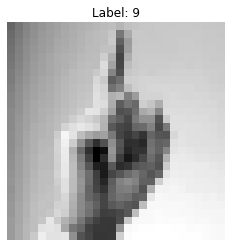

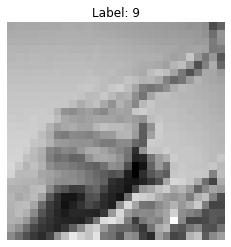

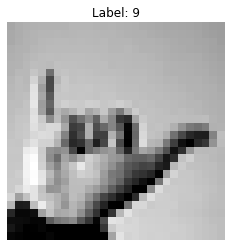

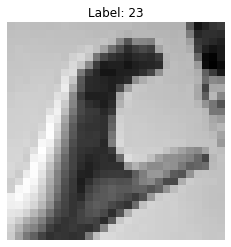

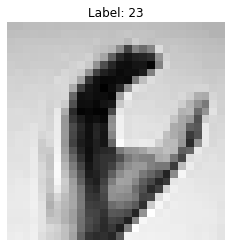

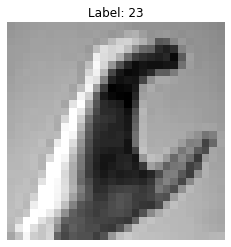

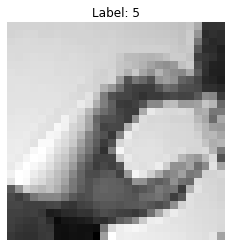

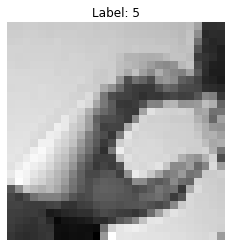

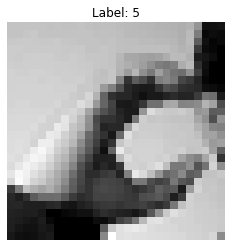

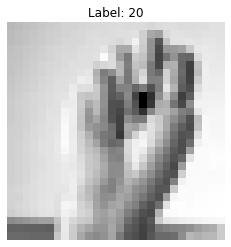

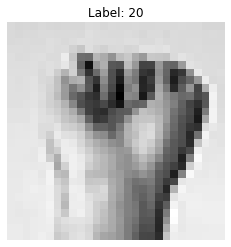

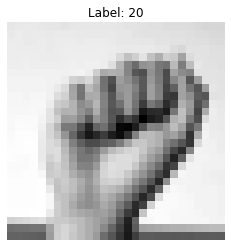

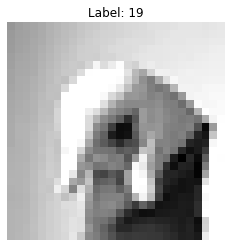

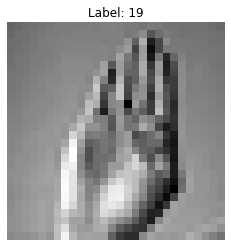

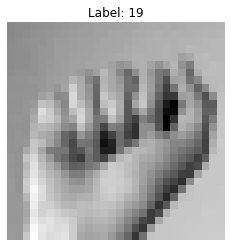

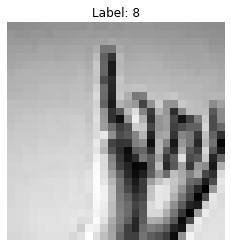

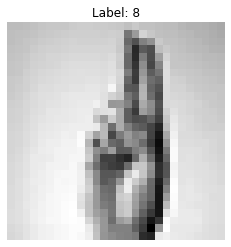

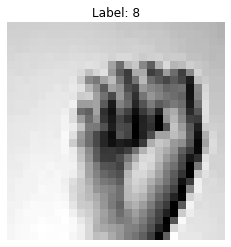

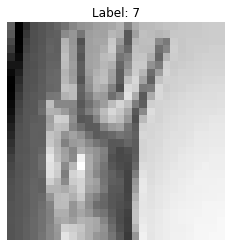

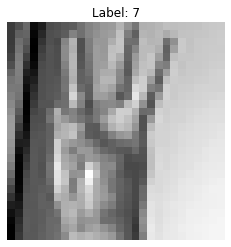

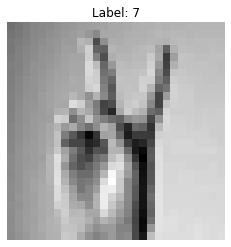

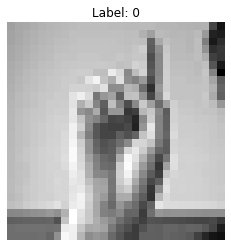

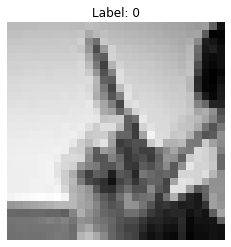

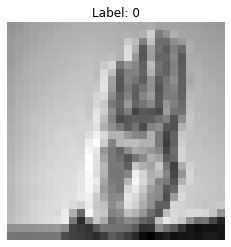

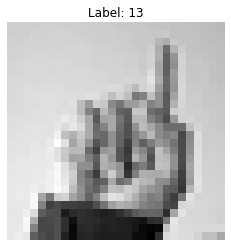

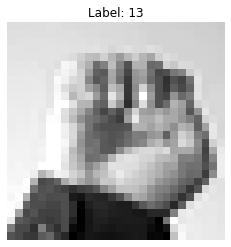

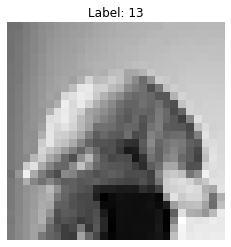

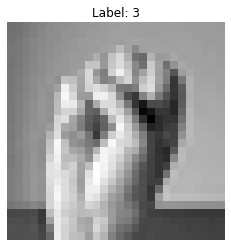

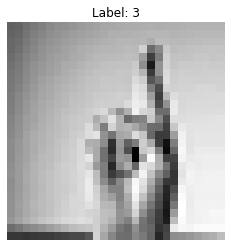

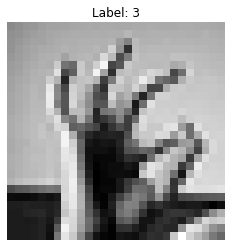

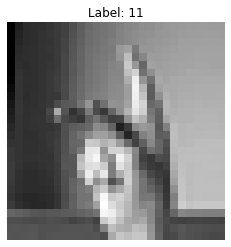

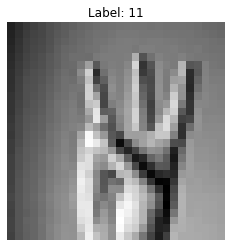

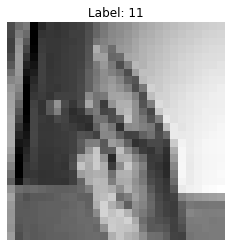

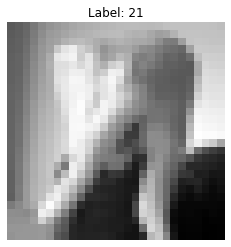

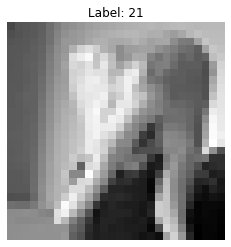

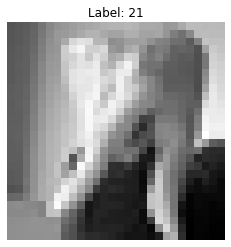

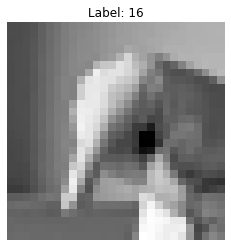

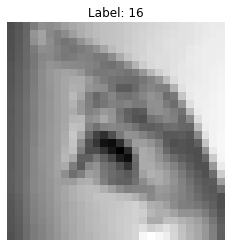

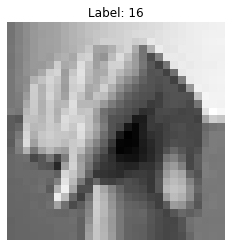

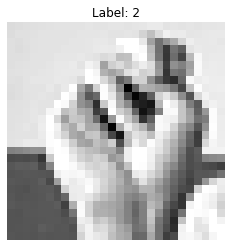

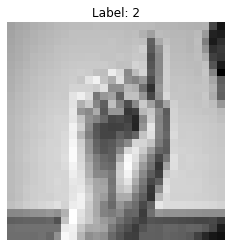

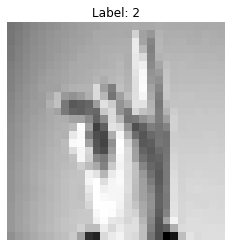

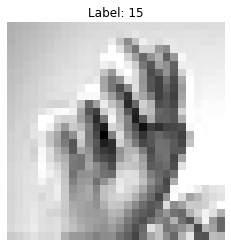

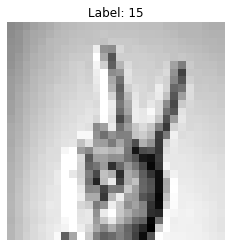

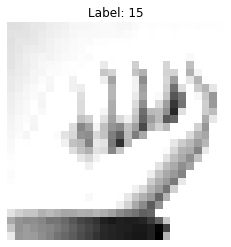

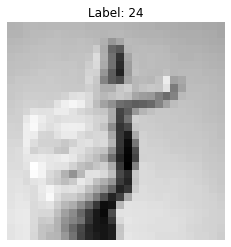

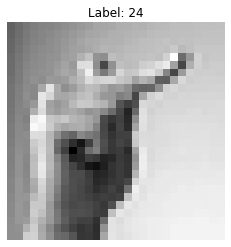

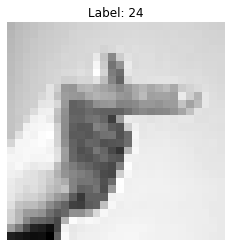

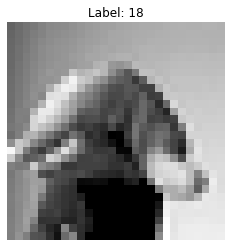

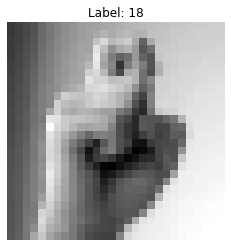

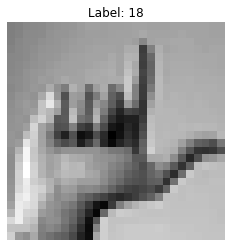

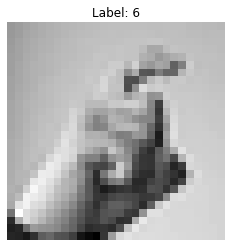

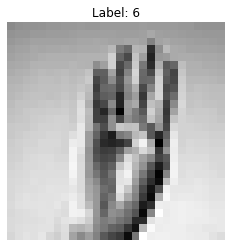

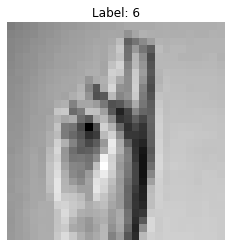

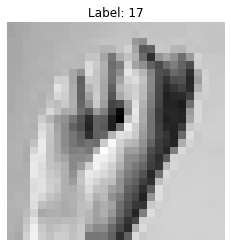

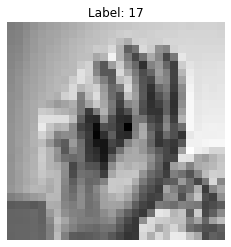

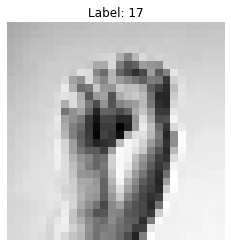

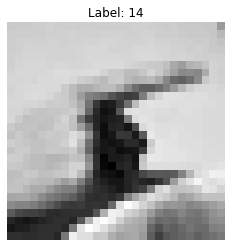

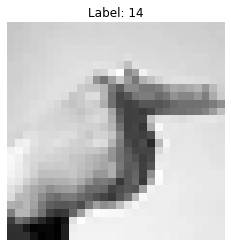

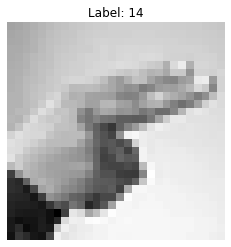

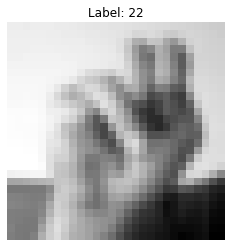

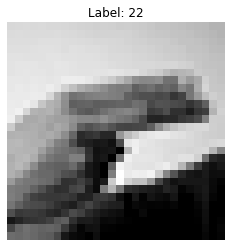

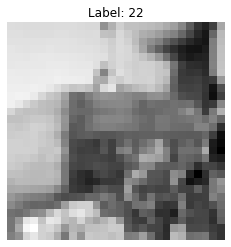

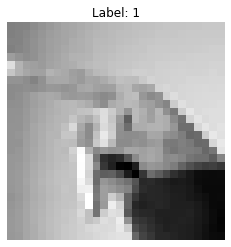

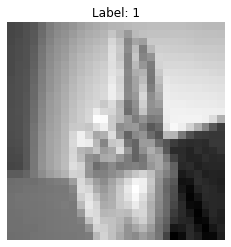

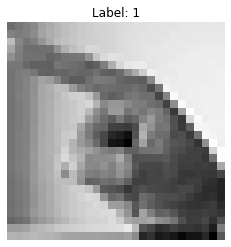

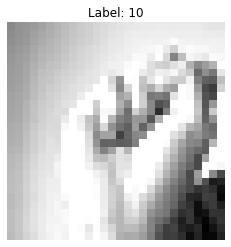

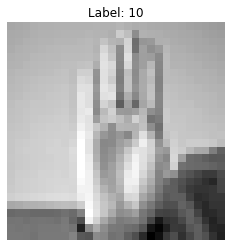

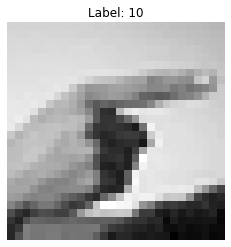

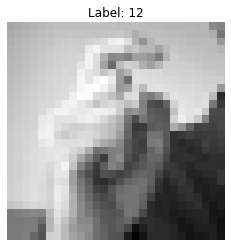

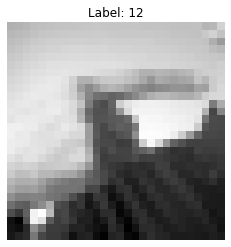

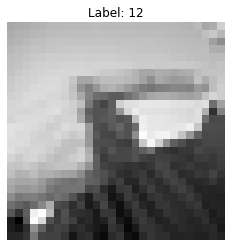

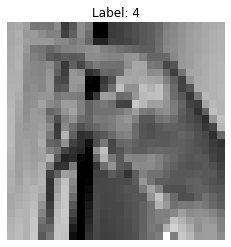

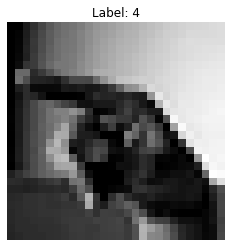

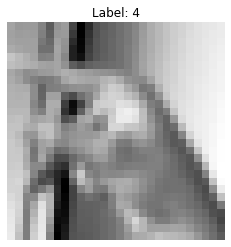

In [25]:
for cluster_idx, images in mappings.items():
    for i, image_flat in enumerate(images[:3]):
        image_reshaped = image_flat.reshape(28, 28) 
        plt.imshow(image_reshaped, cmap='gray')  
        plt.title(f"Label: {cluster_idx}")  
        plt.axis('off')  
        plt.show()  

     

# Cluster Vizualization and Analysis

# Initializing CNN model

In [12]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)  

cuda:0


In [13]:
#(batch_size, 1, 28, 28)


class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 15, 3, 1, 1)
        self.pool = nn.AvgPool2d(2, 2)
        self.conv2 = nn.Conv2d(15, 20, 3,1,1)
        self.conv3 = nn.Conv2d(20, 20, 3,1,1)
        self.fc1 = nn.Linear(180, 100)
        
        self.fc3 = nn.Linear(100, 26)
        
    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = self.pool(F.relu(self.conv3(x)))
        x = torch.flatten(x, 1)
        x = F.relu(self.fc1(x))
        x = self.fc3(x)
        
        
        
        
        return x
    
    
net = Net()     
net.to(device)  
        
    
    
    

Net(
  (conv1): Conv2d(1, 15, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): AvgPool2d(kernel_size=2, stride=2, padding=0)
  (conv2): Conv2d(15, 20, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv3): Conv2d(20, 20, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (fc1): Linear(in_features=180, out_features=100, bias=True)
  (fc3): Linear(in_features=100, out_features=26, bias=True)
)

In [32]:
data.shape

(27455, 784)

In [14]:
loss_func = nn.CrossEntropyLoss()  
opt = optim.SGD(net.parameters(), lr=0.001, momentum=0.9) 

In [15]:
labels = np.array(train.get("label"))
labels

array([ 3,  6,  2, ..., 18, 17, 23])

# Training CNN

In [16]:
data_tensor = torch.Tensor(data).view(-1, 1, 28, 28)  
labels_tensor = torch.Tensor(labels).long().squeeze()  


dataset = TensorDataset(data_tensor, labels_tensor)
data_loader = DataLoader(dataset, batch_size=4, shuffle=True)


criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=0.001)

num_epochs = 10  
for epoch in range(num_epochs):
    running_loss = 0.0
    for i, data in enumerate(data_loader, 0):
        
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)

        
        optimizer.zero_grad()

        
        outputs = net(inputs)

        
        loss = criterion(outputs, labels)

        
        loss.backward()
        optimizer.step()

        
        running_loss += loss.item()
        if i % 100 == 99:  
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 100))
            running_loss = 0.0

print('Finished Training')

[1,   100] loss: 3.266
[1,   200] loss: 3.061
[1,   300] loss: 2.532
[1,   400] loss: 2.000
[1,   500] loss: 1.775
[1,   600] loss: 1.450
[1,   700] loss: 1.352
[1,   800] loss: 1.154
[1,   900] loss: 1.054
[1,  1000] loss: 0.822
[1,  1100] loss: 0.803
[1,  1200] loss: 0.748
[1,  1300] loss: 0.775
[1,  1400] loss: 0.612
[1,  1500] loss: 0.541
[1,  1600] loss: 0.545
[1,  1700] loss: 0.549
[1,  1800] loss: 0.486
[1,  1900] loss: 0.491
[1,  2000] loss: 0.439
[1,  2100] loss: 0.414
[1,  2200] loss: 0.429
[1,  2300] loss: 0.267
[1,  2400] loss: 0.503
[1,  2500] loss: 0.435
[1,  2600] loss: 0.301
[1,  2700] loss: 0.245
[1,  2800] loss: 0.245
[1,  2900] loss: 0.236
[1,  3000] loss: 0.292
[1,  3100] loss: 0.241
[1,  3200] loss: 0.182
[1,  3300] loss: 0.300
[1,  3400] loss: 0.264
[1,  3500] loss: 0.163
[1,  3600] loss: 0.245
[1,  3700] loss: 0.163
[1,  3800] loss: 0.222
[1,  3900] loss: 0.164
[1,  4000] loss: 0.148
[1,  4100] loss: 0.165
[1,  4200] loss: 0.114
[1,  4300] loss: 0.109
[1,  4400] 

# Observing Accuracy of CNN on Test Data

In [28]:
test_data_tensor = torch.Tensor(test_data).view(-1, 1, 28, 28)
test_labels_tensor = torch.Tensor(test_labels).long().squeeze()


test_dataset = TensorDataset(test_data_tensor, test_labels_tensor)
test_loader = DataLoader(test_dataset, batch_size=4, shuffle=False)


net.eval()  
correct = 0
total = 0
with torch.no_grad():  
    for data in test_loader:
        images, labels = data
        images, labels = images.to(device), labels.to(device)

        
        outputs = net(images)

        
        _, predicted = torch.max(outputs.data, 1)

        
        total += labels.size(0)

        
        correct += (predicted == labels).sum().item()


test_data_tensor = torch.Tensor(test_data).view(-1, 1, 28, 28)
test_labels_tensor = torch.Tensor(test_labels).long().squeeze()


test_dataset = TensorDataset(test_data_tensor, test_labels_tensor)
test_loader = DataLoader(test_dataset, batch_size=4, shuffle=False)


net.eval()  
correct = 0
total = 0
with torch.no_grad():  
    for data in test_loader:
        images, labels = data
        images, labels = images.to(device), labels.to(device)

        
        outputs = net(images)

        
        _, predicted = torch.max(outputs.data, 1)

        
        total += labels.size(0)

        
        correct += (predicted == labels).sum().item()


accuracy = 100 * correct / total
print(f'Accuracy : {accuracy:.2f}%')

Accuracy of the network on the test images: 93.67%
Accuracy of the network on the test images: 93.67%
